<h1><center>VIRDIO SAMUEL SARAGIH</center></h1>

<h1><center>122450124</center></h1>

## Tentukan data yang akan anda gunakan dalam visualisasi

Data yang akan digunakan adalah data nilai UTBK 2019 yang diambil dari kaggle

## Tujuan
Tujuan dari visualisasi data ini adalah untuk melihat nilai minimum yang diperlukan untuk masuk kedalam prodi-prodi yang ada di ITERA pada tahun 2019

## User
Pengguna dari visualisasi ini adalah siswa yang ingin mempersiapkan ujian untuk masuk ke ITERA

## Fungsi
Fungsi dari visualisasi ini adalah untuk memberikan gambaran kepada siswa terhadap nilai minimum masuk ITERA

## Tone
Tone warna yang digunakan adalah gelap ke cerah, semakin gelap maka semakin kecil nilainya, dan sebaliknya



# Data Preprocessing

In [121]:
!kaggle datasets download -d ekojsalim/indonesia-college-entrance-examination-utbk-2019

Dataset URL: https://www.kaggle.com/datasets/ekojsalim/indonesia-college-entrance-examination-utbk-2019
License(s): unknown
indonesia-college-entrance-examination-utbk-2019.zip: Skipping, found more recently modified local copy (use --force to force download)


In [122]:
!unzip /content/indonesia-college-entrance-examination-utbk-2019.zip

Archive:  /content/indonesia-college-entrance-examination-utbk-2019.zip
replace majors.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [123]:
import pandas as pd

In [124]:
prodi=pd.read_csv('/content/majors.csv')

In [125]:
skorITERA = pd.read_csv('/content/score_science.csv')
skorITERA = skorITERA[skorITERA["id_first_university"]==192]

In [126]:
df=pd.merge(prodi[["id_major","major_name"]], skorITERA[["id_first_major","score_bio","score_fis","score_kim","score_kmb","score_kpu","score_kua","score_mat","score_ppu"]], left_on='id_major', right_on='id_first_major')
df['average'] = df[['score_bio', 'score_fis', 'score_kim', 'score_kmb', 'score_kpu', 'score_kua', 'score_mat', 'score_ppu']].mean(axis=1)

In [127]:
dfSort = df.sort_values('average', ascending=True)
df = dfSort.drop_duplicates(subset='id_first_major', keep='first')

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Visualisasi Data**

<ipython-input-131-3f54616608b6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='major_name', y='average', data=df.head(10),palette='viridis')


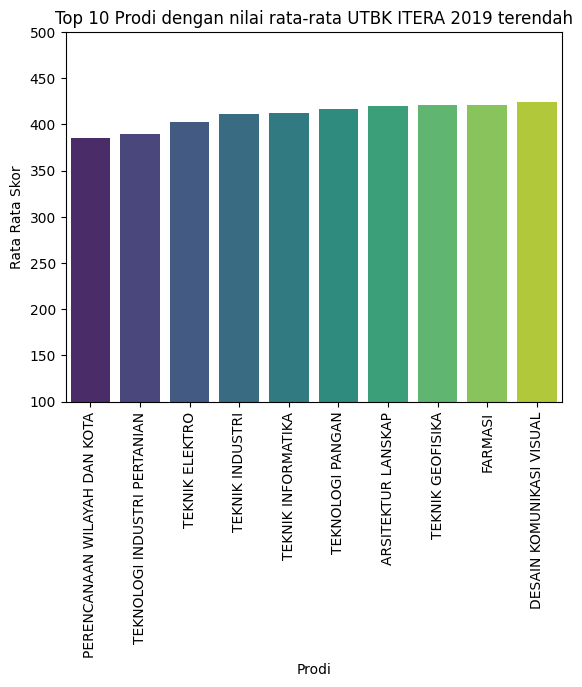

In [131]:
sns.barplot(x='major_name', y='average', data=df.head(10),palette='viridis')
plt.ylim(100, 500)
plt.xticks(rotation=90)
plt.xlabel('Prodi')
plt.ylabel('Rata Rata Skor')
plt.title('Top 10 Prodi dengan nilai rata-rata UTBK ITERA 2019 terendah')
plt.show()

Dapat disimpulkan bahwa, 10 prodi yang ditampilkan memiliki skor minimum dibawah 450, prodi PWK mempunyai skor paling kecil, yaitu kurang lebih 390 skor